In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
FOLDER = "data/tiempos-minutos.csv"
SEED = 123
TEST_SIZE = 0.2

In [4]:
df = pd.read_csv(FOLDER, sep=";")
df.head()

,P1,P2,P3,P4,P5,P6,T_Final
0,172,254,356,385,514,636,703
1,163,253,371,408,556,674,738
2,188,279,389,419,580,728,803
3,195,288,397,425,579,729,800
4,195,296,415,453,619,766,863


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   P1       268 non-null    int64
 1   P2       268 non-null    int64
 2   P3       268 non-null    int64
 3   P4       268 non-null    int64
 4   P5       268 non-null    int64
 5   P6       268 non-null    int64
 6   T_Final  268 non-null    int64
dtypes: int64(7)
memory usage: 14.8 KB


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler

df_scaled = df.copy()
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_scaled)

X_scaled = df_scaled[:, :-1]
y_scaled = df_scaled[:, -1]

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled, 
    y_scaled, 
    test_size=TEST_SIZE, 
    random_state=SEED
)

regr = SGDRegressor(
    loss="squared_error",
    penalty=None,
    max_iter=1000,
    learning_rate="constant",
    eta0=0.01,
    random_state=SEED,
    verbose=0,
)

regr.fit(X_scaled, y_scaled)


SGDRegressor(learning_rate='constant', penalty=None, random_state=123)

In [8]:
r2 = regr.score(X_test_scaled, y_test_scaled)
print(f"R2: {r2}")

R2: 0.9137668009683038


In [9]:

regr = SGDRegressor(
    loss="squared_error",
    penalty=None,
    max_iter=1,
    learning_rate="constant",
    eta0=0.1,
    random_state=SEED,
    verbose=0,
)

n_epochs = 1000
r2_list = []
for epoch in range(n_epochs):
    regr.partial_fit(X_train_scaled, y_train_scaled)
    r2 = regr.score(X_test_scaled, y_test_scaled)
    r2_list.append(r2)

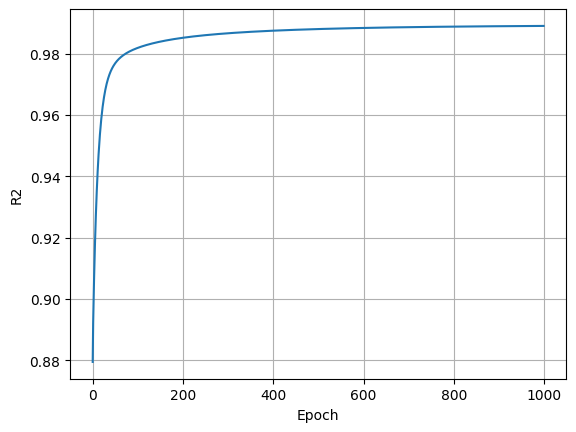

In [10]:
plt.plot(r2_list)
plt.xlabel("Epoch")
plt.grid()
plt.ylabel("R2")
plt.show()

Ejercicio: Dibujar la recta de regresión (usando la regresión lineal) de los puntos para todas las varibles monstrando el valor de R_2

Variable: P1
R2: 0.8671182309844669
MSE: 4122.776701901482
RMSE: 64.2088522082546



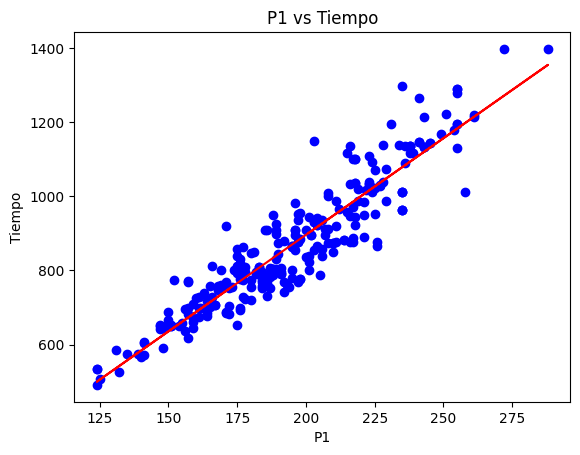

Variable: P2
R2: 0.9111668599193401
MSE: 2756.128270978122
RMSE: 52.498840663181525



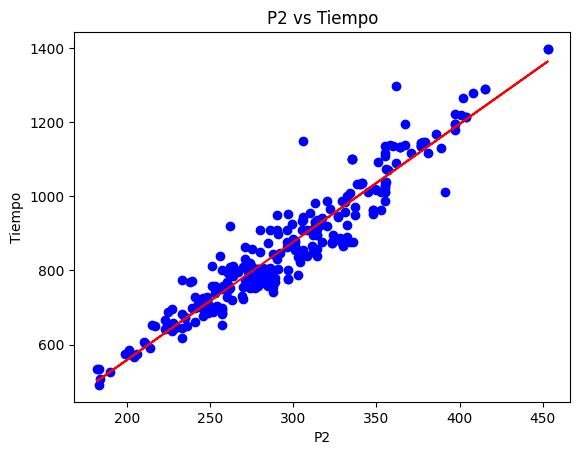

Variable: P3
R2: 0.9354193443329664
MSE: 2003.6730738168094
RMSE: 44.76240692608933



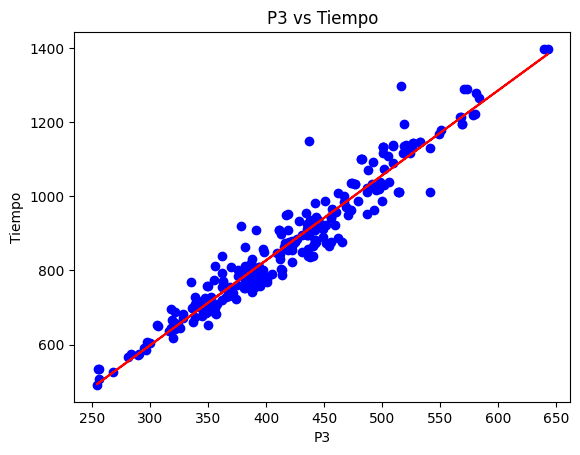

Variable: P4
R2: 0.9431490853135868
MSE: 1763.850890061037
RMSE: 41.99822484416499



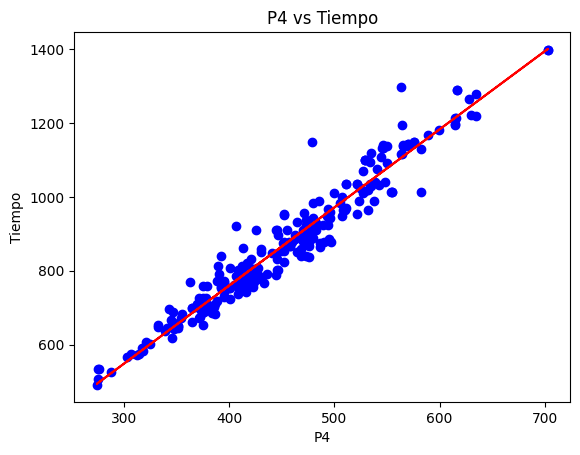

Variable: P5
R2: 0.9731011251791661
MSE: 834.5618457693392
RMSE: 28.888784082569817



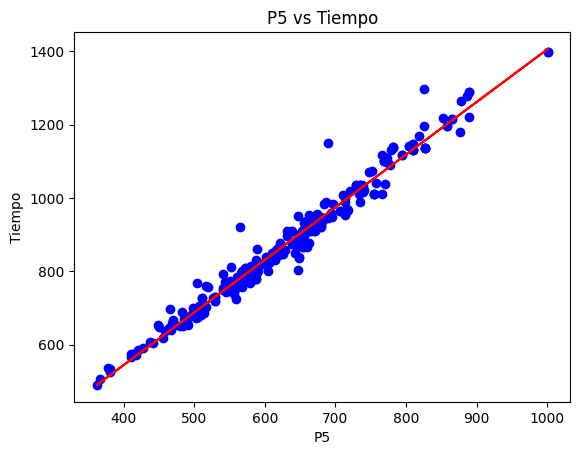

Variable: P6
R2: 0.9931409808934943
MSE: 212.80725248994136
RMSE: 14.58791460387472



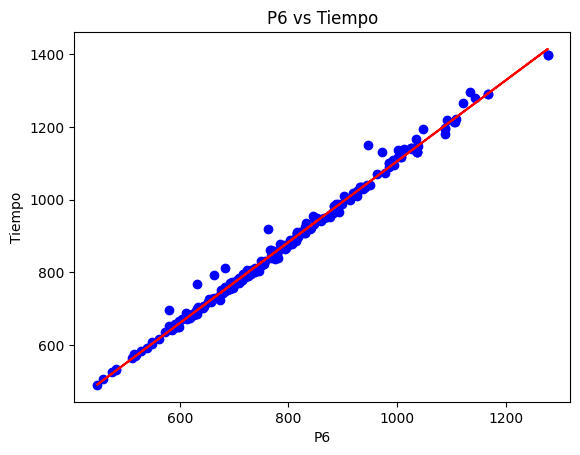

In [ ]:
from sklearn.linear_model import LinearRegression # Vamos a usar la regresión lineal
datos = pd.read_csv("data/tiempos-minutos.csv", sep=";")
X = datos.iloc[:, :-1].values
y = datos.iloc[:, -1].values

variables = datos.columns
reg = LinearRegression()

# Vamos a hacer un bucle para entrenar un modelo por cada variable
for i in range(X.shape[1]):
    train_data = X[:, i].reshape(-1, 1) # Necesitamos que sea una matriz 2x2
    reg.fit(train_data, y)
    predictions = reg.predict(train_data)

    print(f"Variable: {variables[i]}")
    print(f"R2: {reg.score(train_data, y)}") # R2 del modelo, tambien se puede sacar la MSE o RMSE
    mse = np.mean((predictions - y) ** 2)
    print(f"MSE: {mse}")
    rmse = np.sqrt(mse)
    print(f"RMSE: {rmse}")
    print("")

    plt.scatter(X[:, i], y, color = 'blue')
    plt.plot(X[:, i], predictions, color = 'red')
    plt.title(f"{variables[i]} vs Tiempo")
    plt.xlabel(variables[i])
    plt.ylabel("Tiempo")
    plt.show()


> Esto se debe a que, al representar las rectas de regresión para cada variable, podemos identificar cuáles influyen más en el cálculo final de la variable objetivo que queremos predecir. En este caso, observamos que la variable P6 es la que mejor se ajusta a la variable objetivo, por lo que tendrá un mayor peso en la predicción. Además, podemos ordenar las variables por relevancia utilizando métricas como $R^2$, MSE y sus variantes, y filtrar aquellas que superen un umbral determinado, como 0.9 en el caso de $R^2$. Esto convierte el proceso en una especie de selector de características, permitiéndonos enfocarnos en las variables más significativas."  


## Regularizadores

En teoría, el uso de los regularizadores $L_1$ y $L_2$ se estudia con mayor profundidad, pero en la práctica, son herramientas muy útiles y fáciles de aplicar en modelos de aprendizaje automático. Estos regularizadores ayudan a controlar la magnitud de los pesos del modelo, evitando que algunos sean excesivamente grandes en comparación con otros, lo que permite una mejor distribución de los patrones aprendidos y una mayor capacidad de generalización a nuevas muestras.

### **Regularización en la Función de Pérdida MSE**
Los regularizadores $L_1$ y $L_2$ se incorporan directamente en la función de error del modelo, ya que el objetivo es minimizar no solo el error de predicción, sino también la magnitud de los pesos para evitar sobreajuste.

La **función de error cuadrático medio (MSE)** se define como:
$MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$

Donde:
- $y_i$ son los valores reales.
- $\hat{y}_i$ son las predicciones del modelo.
- $N$ es el número total de muestras.

Ahora, aplicamos los regularizadores:

### **Regularización $L_2$ (Ridge Regression)**
La regularización $L_2$, también conocida como **regresión de cresta (Ridge Regression)**, penaliza la suma de los cuadrados de los pesos, ayudando a reducir la complejidad del modelo sin hacer que los coeficientes se vuelvan exactamente cero.

$MSE_{L2} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} w_j^2$

Donde:
- $\lambda$ es el hiperparámetro de regularización que controla la penalización.
- $w_j$ son los pesos del modelo.
- $p$ es el número total de características.

Este término de regularización evita que los pesos sean demasiado grandes, distribuyendo mejor la influencia de cada variable en la predicción.

### **Regularización $L_1$ (Lasso Regression)**
La regularización $L_1$, también conocida como **regresión Lasso (Least Absolute Shrinkage and Selection Operator)**, penaliza la suma de los valores absolutos de los pesos. A diferencia de $L_2$, este método puede llevar algunos pesos a exactamente cero, lo que actúa como un método de selección de características.

$MSE_{L1} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |w_j|$

Este tipo de regularización es útil cuando queremos reducir la dimensionalidad del modelo eliminando características irrelevantes.

### **Diferencias y Aplicaciones**
- $L_2$ distribuye los valores de los pesos de manera más uniforme sin eliminarlos completamente.
- $L_1$ tiende a llevar algunos pesos exactamente a cero, actuando como un método de selección de características.
- Ambos se pueden combinar en **Elastic Net**, que mezcla ambas penalizaciones para aprovechar las ventajas de cada una.

En resumen, estos regularizadores ayudan a mejorar la capacidad del modelo para generalizar mejor a nuevos datos, evitando sobreajuste y mejorando su interpretabilidad.

[ 0.15833119 -0.34823808 -0.03977742  0.27577269 -0.52056303  1.46929675]


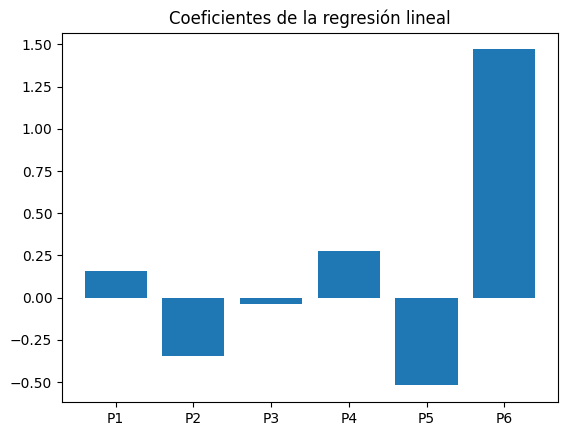

[-0.         -0.05314438 -0.         -0.         -0.32234239  1.37274668]


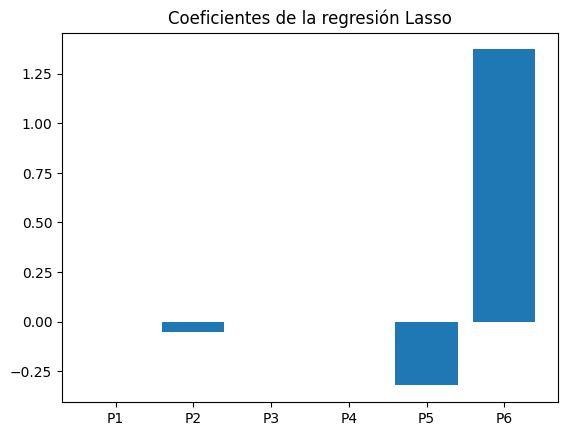

[ 0.15746491 -0.34755301 -0.03802506  0.273606   -0.51984747  1.46897454]


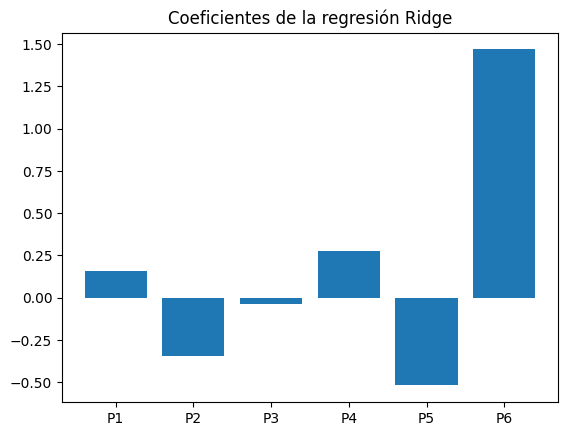

In [27]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# lasso = l1
# ridge = l2

datos = pd.read_csv("data/tiempos-minutos.csv", sep=";")

X = datos.iloc[:, :-1].values
y = datos.iloc[:, -1].values

reg = LinearRegression()
reg.fit(X, y)

reg_coef = reg.coef_
print(reg_coef)

plt.bar(variables[:-1], reg_coef)
plt.title("Coeficientes de la regresión lineal")
plt.show()

reg = Lasso(alpha=10)
reg.fit(X, y)

print(reg.coef_)
reg_coef = reg.coef_
plt.bar(variables[:-1], reg_coef)
plt.title("Coeficientes de la regresión Lasso")
plt.show()

reg = Ridge(alpha=10)
reg.fit(X, y)

reg_coef = reg.coef_
print(reg_coef)
plt.bar(variables[:-1], reg_coef)
plt.title("Coeficientes de la regresión Ridge")
plt.show()